# Import relevant packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train[0].max()

255

In [7]:
#scale the data
x_train=x_train/255
x_test=x_test/255

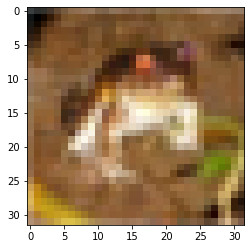

In [8]:
plt.imshow(x_train[0])

# One-hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

# Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [12]:
model=Sequential()
#1st convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#1st pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
#2nd convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#2nd pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

# Early Stopping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5080 - accuracy: 0.4544 - val_loss: 1.3335 - val_accuracy: 0.5259
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1689 - accuracy: 0.5858 - val_loss: 1.1412 - val_accuracy: 0.5953
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0282 - accuracy: 0.6396 - val_loss: 1.0819 - val_accuracy: 0.6214
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9135 - accuracy: 0.6817 - val_loss: 1.0334 - val_accuracy: 0.6443
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8283 - accuracy: 0.7118 - val_loss: 0.9623 - val_accuracy: 0.6703
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7526 - accuracy: 0.7386 - val_loss: 0.9663 - val_accuracy: 0.6739
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6892 - accuracy: 0.7584 - val_loss: 0.9392 - val_ac

# Evaluate the model

In [16]:
metrics=pd.DataFrame(model.history.history)

In [17]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

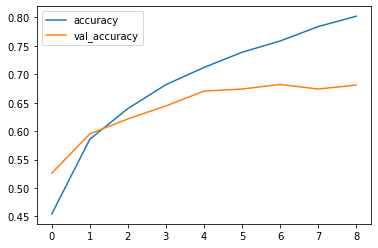

In [18]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

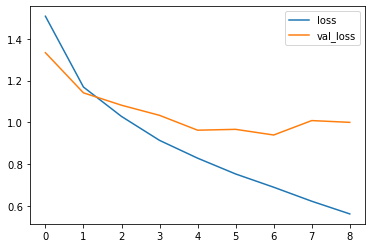

In [19]:
metrics[['loss', 'val_loss']].plot()

In [20]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9998 - accuracy: 0.6809


[0.9998250007629395, 0.680899977684021]

In [21]:
preds_prob=model.predict(x_test)

In [22]:
predictions=np.argmax(preds_prob,axis=1)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.86      0.71      0.78      1000
           2       0.58      0.58      0.58      1000
           3       0.48      0.48      0.48      1000
           4       0.56      0.70      0.62      1000
           5       0.58      0.56      0.57      1000
           6       0.75      0.79      0.77      1000
           7       0.77      0.72      0.75      1000
           8       0.78      0.79      0.79      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [25]:
import seaborn as sns

In [26]:
confusion_matrix(y_test,predictions)

array([[737,  12,  53,  16,  32,  11,  15,  18,  72,  34],
       [ 37, 712,  22,  17,  16,   4,  21,   8,  46, 117],
       [ 49,   5, 580,  75, 103,  73,  73,  24,  12,   6],
       [ 17,   7,  69, 477, 115, 181,  65,  39,  14,  16],
       [ 18,   1,  78,  71, 702,  30,  44,  46,  10,   0],
       [ 11,   1,  57, 205,  79, 559,  30,  47,   9,   2],
       [  8,   9,  50,  56,  59,  18, 789,   7,   3,   1],
       [ 13,   1,  36,  37, 106,  66,   5, 723,   4,   9],
       [ 78,  18,  30,  22,  10,   7,   8,   5, 794,  28],
       [ 37,  63,  18,  25,  29,  14,   7,  20,  51, 736]], dtype=int64)

<AxesSubplot:>

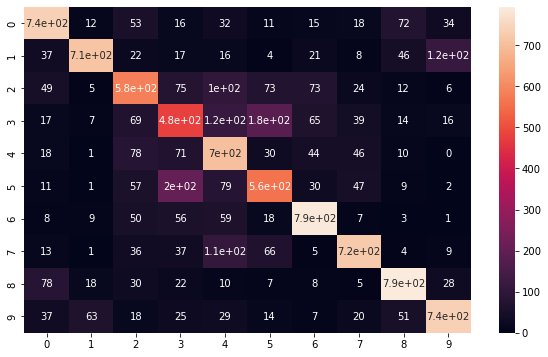

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

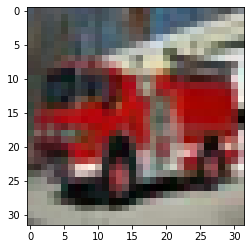

In [28]:
plt.imshow(x_test[23])

In [29]:
pred=model.predict(x_test[23].reshape(1,32,32,3))

In [30]:
np.argmax(pred)

9